In [1]:
import pandas as pd
import numpy as np
import sqlite3
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect(r'C:\Users\josee\OneDrive\Escritorio\Projects\played_tracks.sqlite')
df = pd.read_sql('SELECT * FROM played_tracks', conn)
df['explicit'] = df['explicit'].astype(int)
df['duration_ms'] = pd.to_timedelta(df['duration_ms'].astype(int), unit = 'ms')
df['date'] = df.played_at.apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))
df['day_of_week'] = df.date.dt.day_name()
df.shape

(528, 5)

In [43]:
explicit_table = pd.pivot_table(data = df[df['explicit'] == 1], index= 'artist', values= 'explicit', 
                columns= 'day_of_week', aggfunc= 'sum', margins= True, sort = True, fill_value=0)

explicit_table[:-1].sort_values('All', ascending = False).head(10)

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
artist,,,,,,,,
Bring Me The Horizon,2,17,0,0,7,6,19,51
Slipknot,2,4,0,0,5,1,4,16
Korn,2,0,0,0,3,3,6,14
System Of A Down,0,3,0,0,0,1,2,6
My Chemical Romance,0,1,0,0,0,2,3,6
Avenged Sevenfold,0,0,0,0,1,2,2,5
Rammstein,0,0,0,0,0,0,4,4
Marilyn Manson,0,1,0,0,2,0,1,4
zebrahead,1,0,1,1,0,0,1,4


In [45]:
df.groupby('explicit')['track'].count()/df['track'].count()

explicit
0    0.719697
1    0.280303
Name: track, dtype: float64

In [3]:

df.loc[df['explicit'] == 1, ['artist','explicit']].groupby('artist').sum().sort_values('explicit',ascending=False).head(10)

,explicit
artist,
Bring Me The Horizon,51
Slipknot,16
Korn,14
System Of A Down,6
My Chemical Romance,6
Avenged Sevenfold,5
Rammstein,4
Marilyn Manson,4
zebrahead,4


In [4]:
df.groupby('artist')['duration_ms'].sum().sort_values(ascending= False).head(10)

artist
Bring Me The Horizon   0 days 04:55:18.201000
Slipknot               0 days 02:13:33.725000
Korn                   0 days 02:09:10.991000
Avenged Sevenfold      0 days 01:34:48.897000
Ghost                  0 days 01:33:22.939000
System Of A Down       0 days 01:23:24.062000
Drowning Pool          0 days 01:22:53.818000
Rise Against           0 days 00:50:21.758000
Disturbed              0 days 00:45:21.303000
My Chemical Romance    0 days 00:44:56.505000
Name: duration_ms, dtype: timedelta64[ns]

In [5]:
df.groupby(['track','artist'])['duration_ms'].sum().sort_values(ascending= False).head(10)

track                         artist              
Obey (with YUNGBLUD)          Bring Me The Horizon   0 days 00:29:24.304000
Kingslayer (feat. BABYMETAL)  Bring Me The Horizon   0 days 00:29:20.328000
Lost In The Grandeur          Korn                   0 days 00:26:50.091000
The Chapeltown Rag            Slipknot               0 days 00:24:18.300000
Bodies                        Drowning Pool          0 days 00:23:35.238000
Forgotten                     Korn                   0 days 00:23:00.491000
The Rumbling                  SiM                    0 days 00:22:04.794000
Nero Forte                    Slipknot               0 days 00:21:00.708000
1x1 (feat. Nova Twins)        Bring Me The Horizon   0 days 00:20:57.588000
Nightmare                     Avenged Sevenfold      0 days 00:18:43.359000
Name: duration_ms, dtype: timedelta64[ns]

In [6]:
df.groupby(['track','artist'])['track'].count().sort_values(ascending = False).head(10)

track                         artist              
Obey (with YUNGBLUD)          Bring Me The Horizon    8
Kingslayer (feat. BABYMETAL)  Bring Me The Horizon    8
Forgotten                     Korn                    7
Bodies                        Drowning Pool           7
Lost In The Grandeur          Korn                    7
The Rumbling                  SiM                     6
1x1 (feat. Nova Twins)        Bring Me The Horizon    6
Teardrops                     Bring Me The Horizon    5
Reminded                      Drowning Pool           5
Start The Healing             Korn                    5
Name: track, dtype: int64

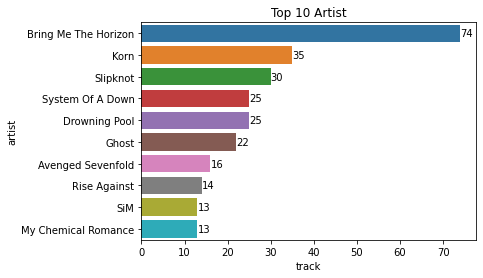

In [29]:
DATA = df.groupby('artist')['track'].count().sort_values(ascending = False).reset_index().head(10)
graf = sns.barplot(x = 'track',y = 'artist', data = DATA,errwidth=0)
graf.bar_label(graf.containers[0])
graf = graf.set_title("Top 10 Artist")
#plt.xticks(rotation=90)
plt.show()

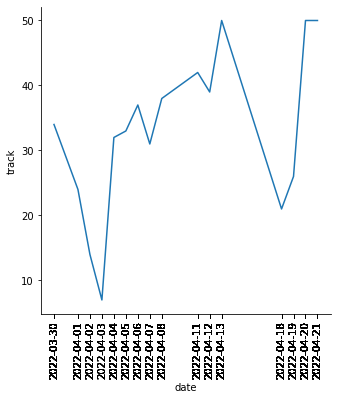

In [10]:
DATA = df.groupby('date')['track'].count().reset_index()
graf = sns.relplot(x= 'date', y= 'track' , data = DATA , kind="line")
graf.set(xticks=df.date.values)
plt.xticks(rotation=90)
plt.show()


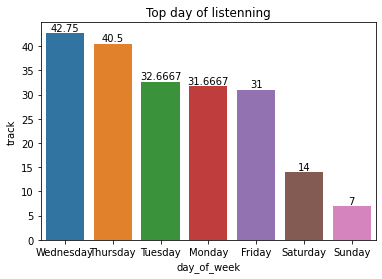

In [48]:
day_group = df.groupby(['date','day_of_week'])['track'].count().reset_index()
DATA = day_group.groupby('day_of_week')['track'].mean().sort_values(ascending = False).reset_index()
graf = sns.barplot(y = 'track',x = 'day_of_week', data = DATA,errwidth=0)
graf.bar_label(graf.containers[0])
graf = graf.set_title("Top day of listenning")
plt.show()

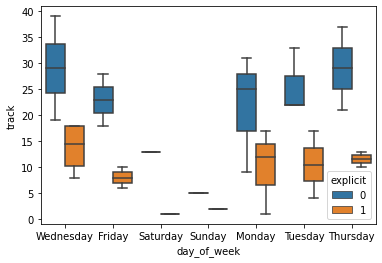

In [55]:
DATA =  df.groupby(['date','day_of_week','explicit'])['track'].count().reset_index()
graf = sns.boxplot(y = 'track',x = 'day_of_week', hue = 'explicit', data = DATA)
plt.show()